<a href="https://colab.research.google.com/github/shirinrameez/DATA-SCIENCE/blob/main/Sentiment_Analysis_on_IMDb_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Problem Statement**:
Sentiment Analysis on IMDb Movie Reviews
we have to predict the number of positive and negative reviews based on sentiments by using different classification models.

##**Objective**:

Build a sentiment detector using Natural Language Processing (NLP) techniques and Long Short-Term Memory (LSTM) neural networks to classify movie reviews from the IMDb dataset as positive or negative.

##**Dataset**:
The IMDb movie review dataset contains 50,000 movie reviews from the Internet Movie Database (IMDb) website, with 25,000 reviews for training and 25,000 reviews for testing. Each review has an associated binary sentiment label: positive (1) or negative (0). The dataset is evenly balanced, with an equal number of positive and negative reviews.

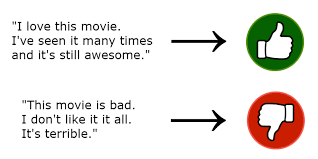

##*Approach*:
> Load the IMDb movie review dataset using TensorFlow Datasets.

> Preprocess the text data by tokenizing the reviews, creating a vocabulary of unique words, and converting the text into padded sequences.

> Build a deep learning model using the Keras API in TensorFlow, incorporating an embedding layer, LSTM layers, and a dense output layer with a sigmoid activation function for binary classification.

> Train the model on the training dataset and evaluate its performance on the test dataset.

> Optimize the model architecture, hyperparameters, and preprocessing steps to achieve the best performance in sentiment classification.

##**Expected Outcome**:
A trained sentiment detector that can accurately classify movie reviews from the IMDb dataset as positive or negative. The model's performance will be evaluated using metrics such as accuracy, precision, recall, and F1-score on the test dataset.

In [ ]:
# ! pip install tensorflow tensorflow-datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout


In [ ]:
# Load the IMDb movie review dataset
(train_data, test_data), info = tfds.load('imdb_reviews', split=['train', 'test'], with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZDWQ8Y/imdb_reviews-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZDWQ8Y/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZDWQ8Y/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
# Extract texts and labels
train_texts, train_labels = zip(*[(text.numpy().decode('utf-8'), label.numpy()) for text, label in train_data])
test_texts, test_labels = zip(*[(text.numpy().decode('utf-8'), label.numpy()) for text, label in test_data])

In [ ]:
len(train_texts)

25000

In [ ]:
# Preprocessing
vocab_size = 10000
max_length = 150
oov_token = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_texts)
word_index = tokenizer.word_index

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_texts)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding="post", truncating="post")

In [ ]:
train_labels = tf.constant(train_labels, dtype=tf.float32)
test_labels = tf.constant(test_labels, dtype=tf.float32)

In [ ]:
# Model architecture
embedding_dim = 64
lstm_units = 64

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(units=lstm_units, return_sequences=True)),
    Bidirectional(LSTM(units=lstm_units)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 bidirectional (Bidirectiona  (None, 150, 128)         66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
# Train the model
num_epochs = 5
batch_size = 64

In [ ]:
history = model.fit(train_padded, train_labels, epochs=num_epochs, batch_size=batch_size, validation_data=(test_padded, test_labels))

Epoch 1/5
391/391 [==============================] - 370s 925ms/step - loss: 0.4449 - accuracy: 0.7844 - val_loss: 0.4099 - val_accuracy: 0.8391
Epoch 2/5
391/391 [==============================] - 352s 900ms/step - loss: 0.2733 - accuracy: 0.8932 - val_loss: 0.3959 - val_accuracy: 0.8367
Epoch 3/5
391/391 [==============================] - 352s 900ms/step - loss: 0.1943 - accuracy: 0.9305 - val_loss: 0.4599 - val_accuracy: 0.8148
Epoch 4/5
391/391 [==============================] - 356s 912ms/step - loss: 0.1309 - accuracy: 0.9554 - val_loss: 0.5515 - val_accuracy: 0.8144
Epoch 5/5
391/391 [==============================] - 345s 882ms/step - loss: 0.0862 - accuracy: 0.9716 - val_loss: 0.7175 - val_accuracy: 0.8092


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_padded, test_labels)
print("Test accuracy:", accuracy)

782/782 [==============================] - 79s 101ms/step - loss: 0.7175 - accuracy: 0.8092
Test accuracy: 0.8091999888420105


In [ ]:
# Function to preprocess and tokenize input text
def preprocess_and_tokenize(text, tokenizer, max_length):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding="post", truncating="post")
    return padded_sequence

# Function to predict sentiment using the trained model
def predict_sentiment(text, model, tokenizer, max_length):
    preprocessed_text = preprocess_and_tokenize(text, tokenizer, max_length)
    prediction = model.predict(preprocessed_text)
    sentiment = "positive" if prediction > 0.5 else "negative"
    return sentiment, prediction

# Example texts for prediction
example_texts = [
    "I absolutely loved this movie! The acting was fantastic, and the story was captivating.",
    "This movie was a complete waste of time. The plot was boring, and the acting was terrible.",
    "It was an average movie. Some parts were interesting, but overall, I wouldn't watch it again."
]

# Make predictions on example texts
for text in example_texts:
    sentiment, prediction = predict_sentiment(text, model, tokenizer, max_length)
    print(f"Text: {text}\nSentiment: {sentiment} (Score: {prediction[0][0]:.4f})\n")

1/1 [==============================] - 3s 3s/step
Text: I absolutely loved this movie! The acting was fantastic, and the story was captivating.
Sentiment: positive (Score: 0.9980)

1/1 [==============================] - 0s 60ms/step
Text: This movie was a complete waste of time. The plot was boring, and the acting was terrible.
Sentiment: negative (Score: 0.0043)

1/1 [==============================] - 0s 51ms/step
Text: It was an average movie. Some parts were interesting, but overall, I wouldn't watch it again.
Sentiment: positive (Score: 0.9692)

